<a href="https://colab.research.google.com/github/Jtwulf/kthr_lab/blob/main/split_to_N_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [30]:
audio = "/content/drive/MyDrive/B3 ウルフ/songs/3 Years On/01 - So Sweet.mp3"
y, sr = librosa.load(audio)
N = 16
#チェック2

In [61]:
def split_by_beats():
  tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
  beats = librosa.frames_to_time(beat_frames, sr=sr)
  beat_length = np.mean(np.diff(beats))
  segment_length = beat_length * N * 2

  segments = []
  for i in range(0, len(y), int(segment_length * sr)):
    segment = y[i:i + int(segment_length * sr)]
    if len(segment) == int(segment_length * sr):
      segments.append(segment)
  return segments

def plot_and_play_segments(segments):
  for i, segment in enumerate(segments):
    plt.subplot(10, 1, 1)
    librosa.display.waveshow(segment, sr=sr)
    display(Audio(segment, rate=sr))
    plt.title(f'Segment {i+1}')
    plt.show()

def calc_diff_spec(segment1, segment2, sr=sr, n_fft=2048, hop_length=512):
    spec1 = np.abs(librosa.stft(segment1, n_fft=n_fft, hop_length=hop_length))
    spec2 = np.abs(librosa.stft(segment2, n_fft=n_fft, hop_length=hop_length))
    return spec2 - spec1

def plot_and_play_diff_spec(diff_spec, sr=sr, n_fft=2048, hop_length=512):
    librosa.display.specshow(librosa.amplitude_to_db(diff_spec, ref=np.max),
                             sr=sr, hop_length=hop_length, y_axis='linear', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title("diff spec")
    plt.show()

    diff_audio = librosa.istft(diff_spec, hop_length=hop_length)
    display(Audio(diff_audio, rate=sr))

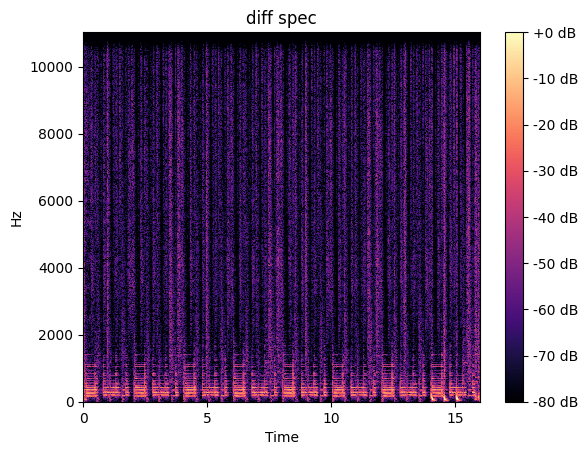

In [62]:
segments = split_by_beats()
#plot_and_play_segments(segments)
diff_spec = calc_diff_spec(segments[0], segments[1])
plot_and_play_diff_spec(diff_spec, sr)